# Домашнее задание №2.

#### 1. *Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.*

In [67]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt

%matplotlib inline

In [68]:
X_, y_, coef = datasets.make_regression(n_samples=10000,
                                       n_features=3,
                                       n_informative=3,
                                       n_targets=1,
                                       noise=2,
                                       coef=True,
                                       random_state=15)

In [69]:
coef

array([56.78437196, 23.7256946 , 44.40999046])

*Стандартизация выборки X_:*

In [70]:
def standartization(x):
    st = (x - x.mean()) / np.std(x)
    return x

In [71]:
X_stand = standartization(X_)

*Метод градиентного спуска:*

In [316]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err

In [317]:
def grad(X, y, iterations, eta=0.01, verbose=False):
    np.random.seed(15)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= eta * (1 / n * 2 * np.dot(X.T, (y_pred - y)))
        if verbose and i % (iterations / 10) == 0:
            print(f'{i}: weights{w}, MSE={err:.3f}')
    return w

*Метод стохастического градиентного спуска:*

In [254]:
def grad_sth(X, y, iterations, eta=0.01, verbose=False):
    np.random.seed(15)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        err = calc_mse(y, np.dot(X, w))
        ind = np.random.randint(n)
        y_pred = np.dot(X[ind], w)
        w -= eta * (2 * np.dot(X[ind].T, (y_pred - y[ind])))
        if verbose and i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
    return w

*Метод градиентного спуска mini-batch:*

In [256]:
def grad_mb(X, y, iterations, batch=10, eta=0.01):
    np.random.seed(15)
    w = np.random.randn(X.shape[1])
    n = X.shape[0] #число наблюдений
    n_batch = n // batch # число батчей
    if n % batch != 0:
        n_batch += 1
    print('Количество батчей -', n_batch)
    for i in range(1, iterations + 1):
        err = calc_mse(y, np.dot(X, w))
        for b in range(n_batch):
            start_ = batch * b
            end_ = batch * (b + 1)
            X_batch = X[start_ : end_, :]
            y_batch = y[start_: end_]
            y_pred = np.dot(X_batch, w)
            
            w -= eta * (1 / y_pred.shape[0] * 2 * np.dot(X_batch.T, (y_pred - y_batch)))
        print(f'{i}: weights={w}, MSE={err:.3f}')
    return err, w 

*Визуализация сравнения среднеквадратичных ошибок разных методов в зависимости от итераций:*

In [259]:
iteration_list = []
w_list_1, w_list_2 = [], []
error_list_1, error_list_2 = [], []

for iterations in range(10, 301, 20):
    iteration_list.append(iterations)
    w_new_1 = grad(X_stand, y_, iterations)
    w_new_2 = grad_sth(X_stand, y_, iterations)
    w_list_1.append(w_new_1)
    w_list_1.append(w_new_2)
    error_list_1.append(calc_mse(y_, np.dot(X_stand, w_new_1)))
    error_list_2.append(calc_mse(y_, np.dot(X_stand, w_new_2)))

errors_1 = np.array(error_list_1)
errors_2 = np.array(error_list_2)

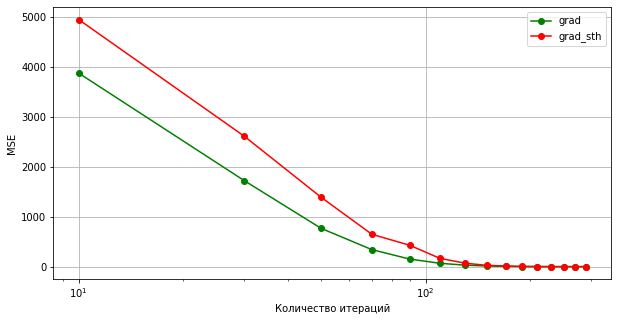

In [260]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.plot(iteration_list, errors_1, 'o-', label='grad', color='green')
plt.plot(iteration_list, errors_2, 'o-', label='grad_sth', color='red')
plt.xlabel('Количество итераций')
plt.ylabel('MSE')
plt.legend()
plt.grid();

*Исходя из графика выше можно сделать вывод о более быстрой сходимости градиентного спуска в отличие от стохастического градиентного спуска.*

In [291]:
%%time
grad(X_stand, y_, 450, verbose=True)

45: weights[33.63767581 14.25251272 26.78943534], MSE=980.985
90: weights[47.40708634 19.88371509 37.43769573], MSE=161.902
135: weights[52.9906303  22.16261629 41.64711844], MSE=29.539
180: weights[55.25437392 23.08476964 43.31174208], MSE=8.137
225: weights[56.17201043 23.45787899 43.97024822], MSE=4.675
270: weights[56.5439253  23.60882667 44.23083617], MSE=4.115
315: weights[56.69463768 23.66988935 44.33399348], MSE=4.024
360: weights[56.75570231 23.69458875 44.37484395], MSE=4.009
405: weights[56.78044055 23.70457861 44.39102646], MSE=4.007
450: weights[56.79046103 23.70861875 44.39743923], MSE=4.006
Wall time: 146 ms


array([56.79046103, 23.70861875, 44.39743923])

In [296]:
%%time
grad_sth(X_stand, y_, 450, verbose=True)

45: weights=[31.26922902 14.40352988 14.52069675], MSE=1666.613
90: weights=[42.5715785  22.27520154 29.57519839], MSE=446.686
135: weights=[51.53155038 24.14080237 39.46881121], MSE=57.621
180: weights=[55.32992637 24.2044369  42.13405924], MSE=11.750
225: weights=[56.25750952 23.39187868 43.834729  ], MSE=4.817
270: weights=[56.40187031 23.51005905 44.00880893], MSE=4.359
315: weights=[56.51796215 23.15820659 44.01385817], MSE=4.548
360: weights=[56.30479895 23.72552695 44.54763591], MSE=4.292
405: weights=[56.68310928 24.03291523 44.22368797], MSE=4.136
450: weights=[56.74290181 23.79579945 44.41340178], MSE=4.017
Wall time: 103 ms


array([56.74290181, 23.79579945, 44.41340178])

In [271]:
%%time
grad_mb(X_stand, y_, 6, batch=100)

Количество батчей - 100
1: weights=[49.11704223 20.58798682 38.74463034], MSE=5812.371
2: weights=[55.76315182 23.30041433 43.68365739], MSE=104.946
3: weights=[56.65598111 23.66355292 44.31180843], MSE=5.762
4: weights=[56.77582738 23.71214472 44.39183418], MSE=4.037
5: weights=[56.79190302 23.71864378 44.40204691], MSE=4.007
6: weights=[56.79405793 23.71951265 44.40335249], MSE=4.006
Wall time: 15.2 ms


(4.006431458807156, array([56.79405793, 23.71951265, 44.40335249]))

*Метод градиентного спуска mini-batch нельзя сравнить с предыдущими градиентными спусками по итерациям. Но если исходить из скорости работы и точности, то метод mini-batch намного быстрее предыдущих при той же точности (скорость работы в разы выше 15ms в отношении 105ms и 146ms соответственно).*

#### 2.* *Добавить в алгоритм градиентного спуска L1 регуляризацию. Сравнить влияние коэффициентов регуляризации L1 и L2 на величину весов для примера из урока (лучше графически).*

*Начальные данные:*

In [312]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [21, 25, 27, 20, 25, 18, 35, 60, 20, 30]]).T  # возраст репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]    # средний балл ЕГЭ (целевая переменная)

*Стандартизация*

In [318]:
X_stand = standartization(X)

*Градиентный спуск*

*L1-регуляризация:*

*L2-регуляризация:*

*Визуальное сравнение коэффициентов регуляризации:*

In [ ]:
w_list = []
l_list = []
error_list =[]

for l in np.logspace(start=-4, stop=1, num=20):
    l_list.append(l)
    w_new = eval_model_reg2(?)(X_st, 